In [1]:
# Standard modules
import pdb
import sys
import os
import pickle
import numpy as np
import pandas as pd
from lmfit import Parameters, minimize, fit_report
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")

sys.path.append("../..")

from simstackwrapper import SimstackWrapper
from simstackresults import SimstackResults
from simstackplots import SimstackPlots
from simstacktoolbox import SimstackToolbox

from IPython.core.display import display, HTML
display(HTML("<style>.container { width:98% !important; }</style>"))

# Step 3.  This is where SEDs are fit to the combined stacked data

An MCMC is fit using emcee. Optional parameters are number of samples, number of initial sample to discard, the sigma-level for non-detections (i.e., upper limits), and whether to fit to quiescent or not.  For fits that converge to unrealistic local minima, Gaussian priors can be selected. 

In [2]:
# Import catalog with SimstackWrapper
combined_pickle_filename = "cosmos2020_farmer_nuvrj_0p01_0p5_1_1p5_2_2p5_3_3p5_4_5_6_8_10p0_X_4_foregnd_atonce_bootstrap_1-150"
combined_pickle_path = os.environ['PICKLESPATH']+'/'+os.path.join("simstack","stacked_flux_densities", combined_pickle_filename)
underscore_suffix = ""
path_ini_file = os.path.join(combined_pickle_path, "cosmos2020_farmer.ini")
path_pickle_file = os.path.join(combined_pickle_path, combined_pickle_filename+".pkl")
if os.path.isfile(path_ini_file):
    simstack_catalog_object = SimstackWrapper(path_ini_file, read_maps=False, read_catalog=True, keep_catalog=True, stack_automatically=False, save_automatically=False)
else:
    print(path_ini_file+' not found')

In [3]:
# Import saved stacking results
simstack_object = SimstackToolbox.import_saved_pickles(path_pickle_file)

In [4]:
# Inspect object keys
simstack_object.results_dict['band_results_dict'].keys()

dict_keys(['mips_24', 'pacs_green', 'pacs_red', 'spire_psw', 'spire_pmw', 'spire_plw', 'scuba_850'])

In [5]:
# Pass saved results into SimstackResults
simstack_object = SimstackResults(simstack_object)

In [6]:
# Pass saved results into SimstackPlots
simstack_object = SimstackPlots(simstack_object)

In [7]:
# Call parse_results which translates the raw results into a results_dict for plotting/interpreting.
simstack_object.parse_results(catalog_object=simstack_catalog_object, estimate_mcmcs=False)

In [8]:
# Extract SEDs Dict
sed_results_dict = simstack_object.results_dict['sed_bootstrap_results_dict']

In [9]:
# Extract Bootstrap Dict
bootstrap_results_dict = simstack_object.results_dict['bootstrap_results_dict']

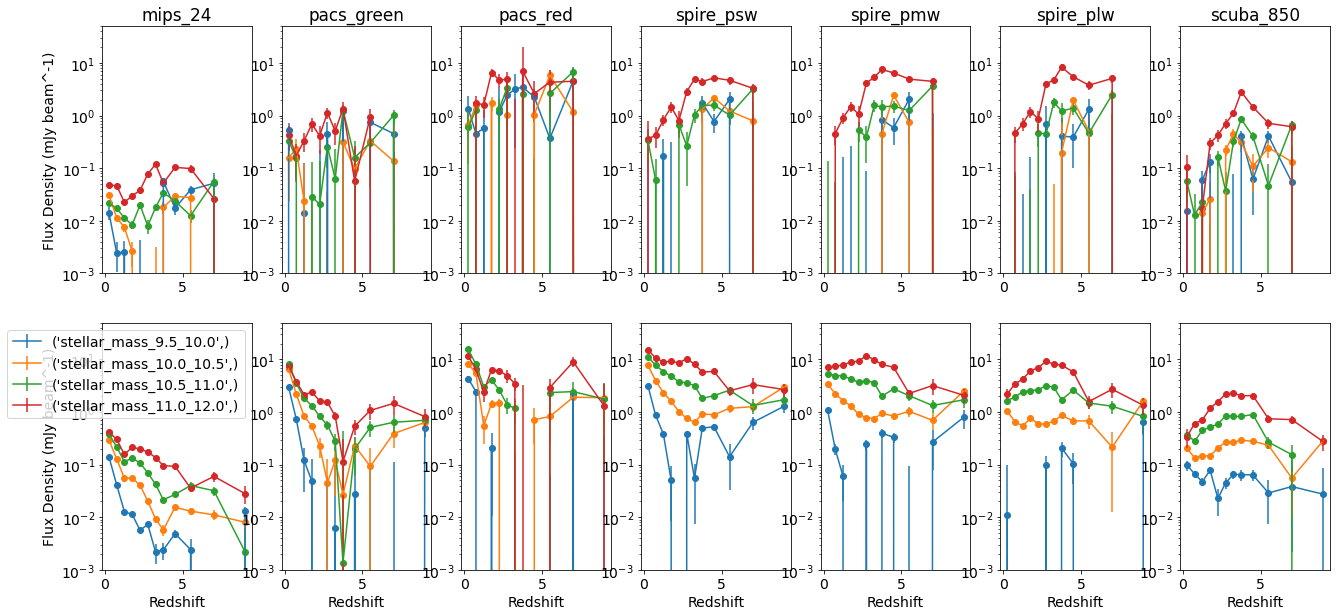

In [10]:
simstack_object.plot_flux_densities()

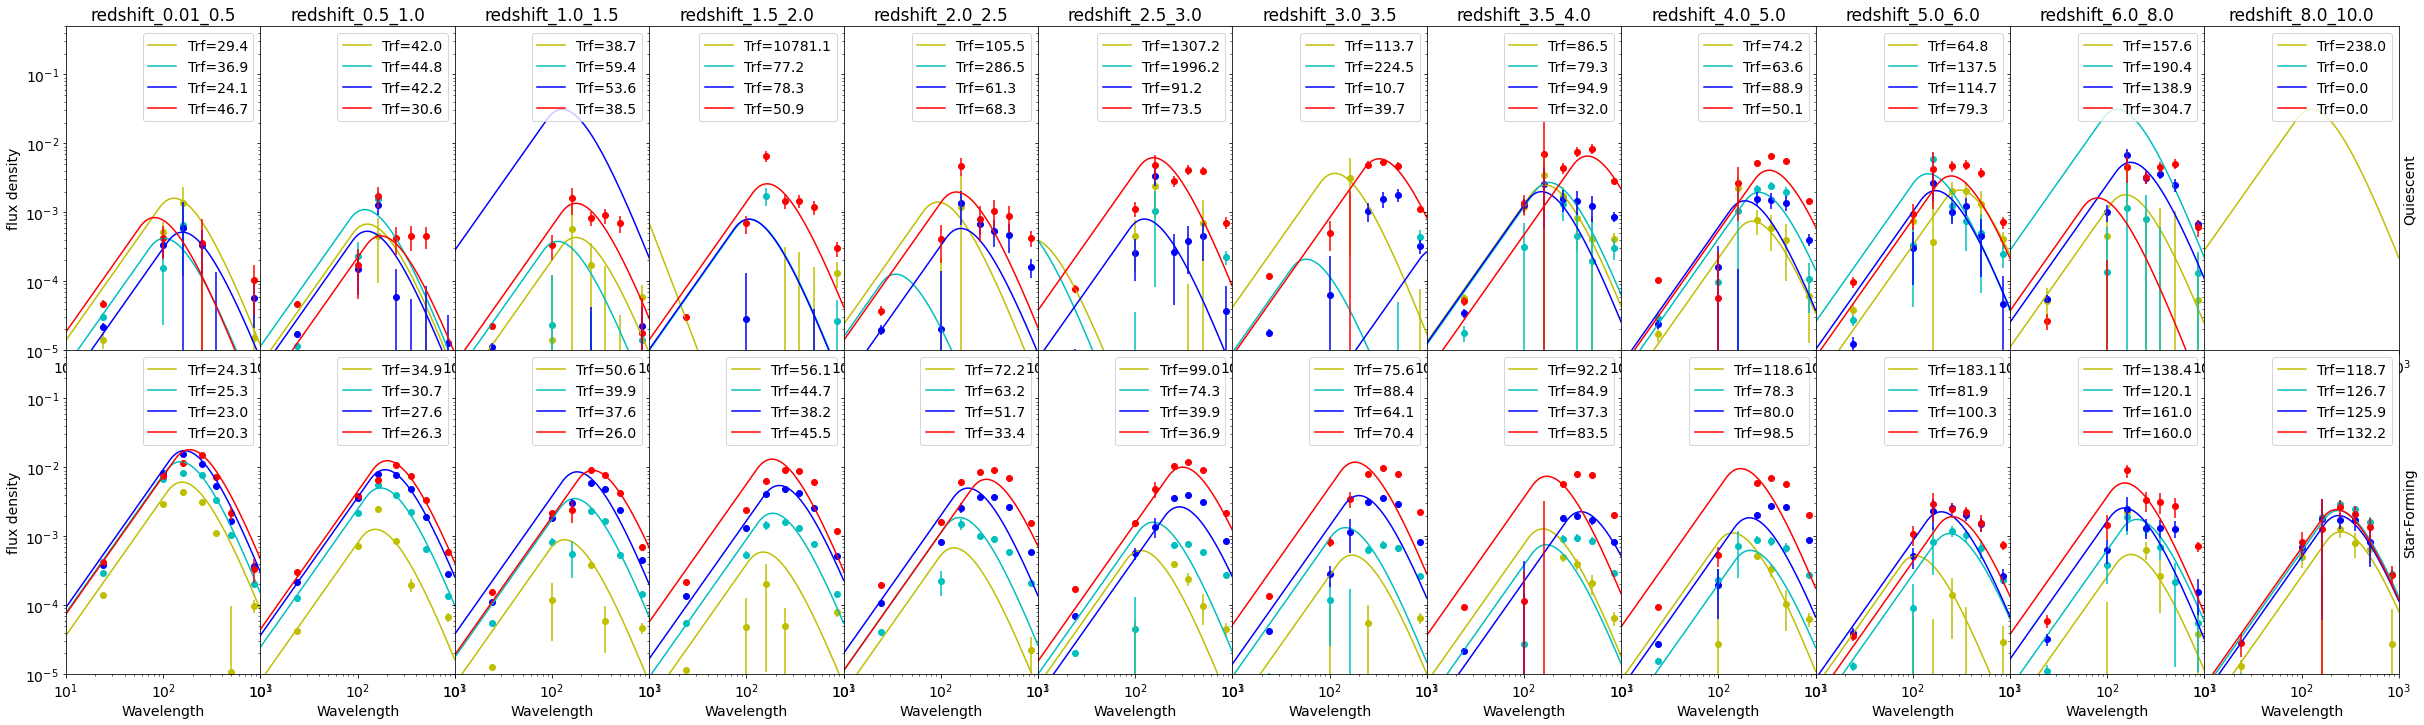

In [11]:
simstack_object.plot_seds(sed_results_dict)

In [12]:
# List bins to impose a Temperature prior on.  These are bins that find unphysical local minima.
not_flat_prior = ['redshift_1.5_2.0__stellar_mass_9.5_10.0__split_params_1',
                  'redshift_2.0_2.5__stellar_mass_9.5_10.0__split_params_1',
                  'redshift_2.0_2.5__stellar_mass_10.0_10.5__split_params_1',
                  'redshift_3.0_3.5__stellar_mass_9.5_10.0__split_params_1',
                  'redshift_3.5_4.0__stellar_mass_10.0_10.5__split_params_1',
                  'redshift_5.0_6.0__stellar_mass_9.5_10.0__split_params_1',
                  'redshift_6.0_8.0__stellar_mass_10.5_11.0__split_params_1',
                  'redshift_6.0_8.0__stellar_mass_11.0_12.0__split_params_1']

In [13]:
sample_number = 15000
sample_discard = 3000
sample_sigma = 3
sample_qt = True
sample_speed = ''
sample_prior = '_mixed_prior_qt'
mips_penalty='auto'
flat_prior = not_flat_prior
sample_prefix = "{}-{}-{}sigma{}{}".format(sample_number, sample_discard, sample_sigma, sample_speed, sample_prior)

In [ ]:
# Load MCMC results
include_qt = sample_qt
overwrite_samples = True
samples_filename  ='_'.join(['mcmc_samples',sample_prefix,'dict'])+'.pkl'
print(os.path.isfile(os.path.join(combined_pickle_path+underscore_suffix,samples_filename)))
if os.path.isfile(os.path.join(combined_pickle_path+underscore_suffix,samples_filename)) and not overwrite_samples:
    flat_samples_dict = SimstackToolbox.import_saved_pickles(os.path.join(combined_pickle_path+underscore_suffix,samples_filename))
    print('importing ',flat_samples_dict.keys())
else:
    print('estimating ',samples_filename)
    flat_samples_dict = simstack_object.loop_mcmc_sed_estimator(sed_results_dict, simstack_catalog_object.catalog_dict['tables'], 
                                                                mcmc_iterations=sample_number, mcmc_discard=sample_discard, sigma_upper_limit=sample_sigma,
                                                                flat_prior=flat_prior, include_qt=include_qt, mips_penalty=mips_penalty)

True
estimating  mcmc_samples_15000-3000-3sigma_mixed_prior_qt_dict.pkl
redshift_0.01_0.5__stellar_mass_9.5_10.0__split_params_0 : T_rf_init(z=0.4) = 24.9+-0.25, A_init(z=0.4) = -36.3+-0.10


100%|████████████████████████████████████████████████████████████████████████████| 15000/15000 [07:30<00:00, 33.27it/s]


redshift_0.01_0.5__stellar_mass_9.5_10.0__split_params_1 : T_rf_init(z=0.4) = 24.6+-0.25, A_init(z=0.4) = -36.3+-0.10


100%|████████████████████████████████████████████████████████████████████████████| 15000/15000 [07:56<00:00, 31.50it/s]


redshift_0.01_0.5__stellar_mass_10.0_10.5__split_params_0 : T_rf_init(z=0.4) = 25.0+-0.25, A_init(z=0.4) = -35.7+-0.10


100%|████████████████████████████████████████████████████████████████████████████| 15000/15000 [06:48<00:00, 36.74it/s]


redshift_0.01_0.5__stellar_mass_10.0_10.5__split_params_1 : T_rf_init(z=0.4) = 24.7+-0.25, A_init(z=0.4) = -35.8+-0.10


100%|████████████████████████████████████████████████████████████████████████████| 15000/15000 [07:02<00:00, 35.49it/s]


redshift_0.01_0.5__stellar_mass_10.5_11.0__split_params_0 : T_rf_init(z=0.4) = 25.0+-0.25, A_init(z=0.4) = -35.2+-0.10


100%|████████████████████████████████████████████████████████████████████████████| 15000/15000 [07:32<00:00, 33.17it/s]


redshift_0.01_0.5__stellar_mass_10.5_11.0__split_params_1 : T_rf_init(z=0.4) = 24.9+-0.25, A_init(z=0.4) = -35.3+-0.10


100%|████████████████████████████████████████████████████████████████████████████| 15000/15000 [07:12<00:00, 34.64it/s]


redshift_0.01_0.5__stellar_mass_11.0_12.0__split_params_0 : T_rf_init(z=0.4) = 25.1+-0.25, A_init(z=0.4) = -34.8+-0.10


100%|████████████████████████████████████████████████████████████████████████████| 15000/15000 [07:05<00:00, 35.26it/s]


redshift_0.01_0.5__stellar_mass_11.0_12.0__split_params_1 : T_rf_init(z=0.4) = 25.0+-0.25, A_init(z=0.4) = -34.8+-0.10


100%|████████████████████████████████████████████████████████████████████████████| 15000/15000 [07:00<00:00, 35.70it/s]


redshift_0.5_1.0__stellar_mass_9.5_10.0__split_params_0 : T_rf_init(z=0.8) = 27.5+-0.25, A_init(z=0.8) = -36.3+-0.10


100%|████████████████████████████████████████████████████████████████████████████| 15000/15000 [06:56<00:00, 36.05it/s]


redshift_0.5_1.0__stellar_mass_9.5_10.0__split_params_1 : T_rf_init(z=0.8) = 27.6+-0.25, A_init(z=0.8) = -36.4+-0.10


100%|████████████████████████████████████████████████████████████████████████████| 15000/15000 [08:05<00:00, 30.91it/s]


redshift_0.5_1.0__stellar_mass_10.0_10.5__split_params_0 : T_rf_init(z=0.8) = 27.6+-0.25, A_init(z=0.8) = -35.7+-0.10


100%|████████████████████████████████████████████████████████████████████████████| 15000/15000 [07:45<00:00, 32.24it/s]


redshift_0.5_1.0__stellar_mass_10.0_10.5__split_params_1 : T_rf_init(z=0.8) = 27.6+-0.25, A_init(z=0.8) = -35.8+-0.10


100%|████████████████████████████████████████████████████████████████████████████| 15000/15000 [07:08<00:00, 35.04it/s]


redshift_0.5_1.0__stellar_mass_10.5_11.0__split_params_0 : T_rf_init(z=0.8) = 27.6+-0.25, A_init(z=0.8) = -35.2+-0.10


 95%|████████████████████████████████████████████████████████████████████████    | 14228/15000 [07:02<00:24, 32.05it/s]

In [ ]:
# Save MCMC results
samples_filename  ='_'.join(['mcmc_samples',sample_prefix,'dict'])+'.pkl'
pickle_path = os.environ['PICKLESPATH']+'/'+os.path.join("simstack","stacked_flux_densities",combined_pickle_filename)
path_samples_file = os.path.join(combined_pickle_path+underscore_suffix, samples_filename)
print(path_samples_file)
simstack_object.save_to_pickles(path_samples_file, flat_samples_dict)

In [ ]:
# Plot MCMC SEDs
simstack_object.plot_mcmc_seds(flat_samples_dict, bootstrap_dict=None, errors=('25', '75'), show_qt=True)

In [ ]:
# Plot MCMC SEDs
simstack_object.plot_mcmc_seds(flat_samples_dict, bootstrap_dict=None, errors=('25', '75'))

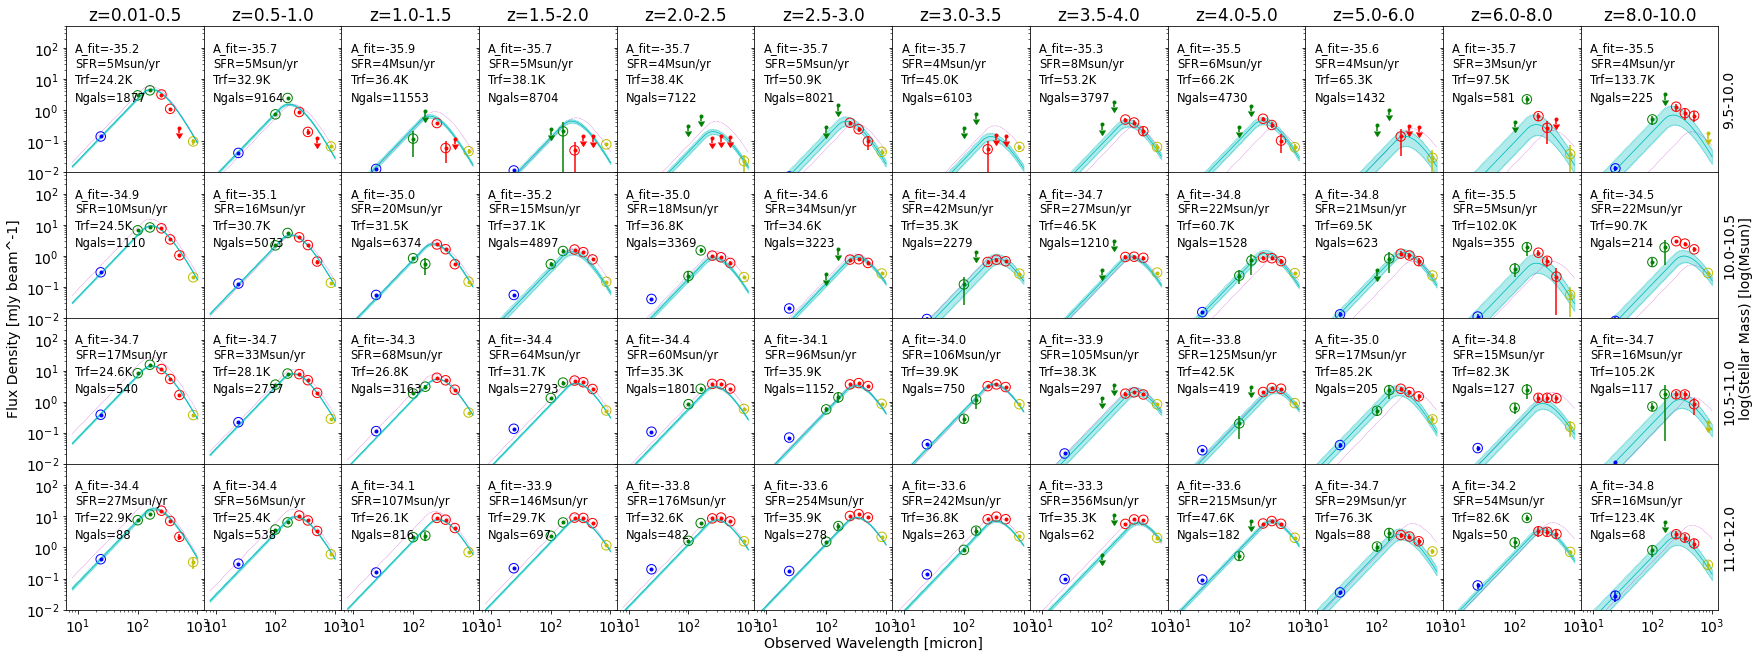

In [22]:
# Plot MCMC SEDs
simstack_object.plot_mcmc_seds(flat_samples_dict, bootstrap_dict=None, errors=('25', '75'))